In [3]:
!pip install pandas
!pip install Matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install pandas_ml

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
     |████████████████████████████████| 7.1 MB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 26.2 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('HeatDemand1.csv')
df.head()


,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](TimeStep),Environment:Site Direct Solar Radiation Rate per Area [W/m2](TimeStep),TZ_001:Zone People Occupant Count [](TimeStep:ON),TZ_001:Zone People Sensible Heating Rate [W](TimeStep),TZ_001:Zone Windows Total Transmitted Solar Radiation Rate [W](TimeStep),DH:District Heating Hot Water Energy [KJ](TimeStep:ON),DH:District Heating Hot Water Rate [KW](TimeStep:ON),DH:District Heating Inlet Temperature [C](TimeStep:ON)
0,01/01 00:15:00,7.2725,0.0,0.0,1.0,80.912482,0.0,500406.3132,556.007015,50
1,01/01 00:30:00,6.0650,0.0,0.0,1.0,79.740535,0.0,474024.5772,526.693975,52
2,01/01 00:45:00,4.8575,0.0,0.0,1.0,78.220023,0.0,365448.8766,406.054307,56
3,01/01 01:00:00,3.6500,0.0,0.0,1.0,77.895519,0.0,276488.1718,307.209080,59
4,01/01 01:15:00,3.8375,0.0,0.0,1.0,77.618478,0.0,224995.4725,249.994969,61


In [3]:
X = df.drop(columns=['Date/Time','DH:District Heating Inlet Temperature [C](TimeStep:ON)'])

In [4]:
y = df['DH:District Heating Inlet Temperature [C](TimeStep:ON)']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

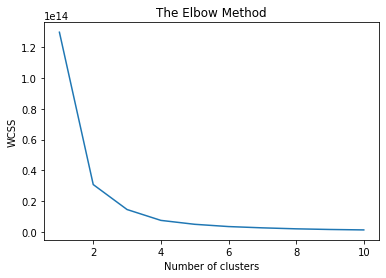

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_train)

In [8]:
y_kmeans

array([0, 2, 0, ..., 0, 1, 3], dtype=int32)

In [9]:
kmeans.cluster_centers_


array([[1.65431414e+01, 1.11710192e+02, 1.89570219e+02, 7.40880843e-01,
        5.23063790e+01, 3.19695220e+02, 2.95624164e+04, 3.28471293e+01],
       [2.10115258e+00, 2.38545091e+01, 3.39751613e+01, 7.70072993e-01,
        5.94617480e+01, 5.45741520e+01, 2.25556087e+05, 2.50617874e+02],
       [6.73668284e+00, 3.32448335e+01, 4.81357418e+01, 7.72547409e-01,
        5.94949131e+01, 7.77863614e+01, 1.62143982e+05, 1.80159980e+02],
       [1.04313090e+01, 6.86486355e+01, 8.43517549e+01, 7.69785575e-01,
        5.92904090e+01, 1.56014988e+02, 9.71224250e+04, 1.07913806e+02]])

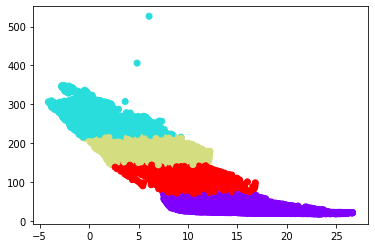

In [10]:
plt.scatter(X_train['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_train['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_kmeans, cmap='rainbow')

In [11]:
y_k = kmeans.fit_predict(X_test)

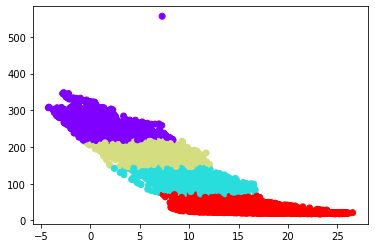

In [12]:
plt.scatter(X_test['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)'], X_test['DH:District Heating Hot Water Rate [KW](TimeStep:ON)'], c = y_k, cmap='rainbow')

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4, metric='euclidean')
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [14]:
y_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
Confusion_Matrix=confusion_matrix(y_test, y_pred)

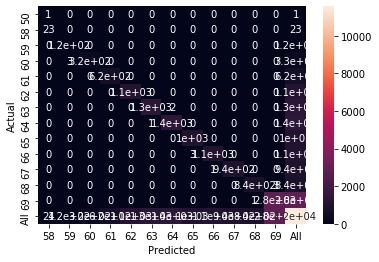

In [16]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix, annot=True)

In [17]:
confusion_matrix

Predicted,58,59,60,61,62,63,64,65,66,67,68,69,All
Actual,,,,,,,,,,,,,
50,1,0,0,0,0,0,0,0,0,0,0,0,1
58,23,0,0,0,0,0,0,0,0,0,0,0,23
59,0,121,0,0,0,0,0,0,0,0,0,0,121
60,0,3,324,0,0,0,0,0,0,0,0,0,327
61,0,0,0,617,0,0,0,0,0,0,0,0,617
62,0,0,0,0,1095,0,0,0,0,0,0,0,1095
63,0,0,0,0,0,1311,2,0,0,0,0,0,1313
64,0,0,0,0,0,1,1392,0,0,0,0,0,1393
65,0,0,0,0,0,0,0,1016,0,0,0,0,1016


In [20]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test, y_pred)

0.9987028709789